# Video Game Sales

Video games have become a dominant force around the world by providing never ending days of entertainment. It has proven to be a staple for many younger to middle aged people since it has able to provide moments of fun, memories, and relief. It is nearly impossible to not know about video games during this day and age as it has become more accepted especially during these times of quarantine. It has been used as a way to escape the present world in order to give some kind of peace of mind even for a short while. It has also become a staple for playing with friends or others as communities are being made for liking the same thing. Aside from this, video games have become more profitable as sales of consoles, video games, and merchandise have been on the rise. It has become more dominant in the business world and serves to be a gigantic cash cow if done right. With this, we wanted to explore the different aspects of video games by specifically looking into the different sales trends of video games and analyze what certain genres are popular. Within this notebook, you will be able to find how we processed, analyzed, and interpretted the data to find out the trends in video games.

Below, we created 10 research questions. These are some of the main questions that came to our minds and wanted to answer them under the context of video game sales.

## Research Questions
- What genre of games have the highest sales? (Jeff)
- What kind of ESRB ratings do top selling games have? (Kristen)
- Which publishers have received the most sales? (Kyle)
- What are the sales trends of certain games in different regions? (Jeff)
- Do certain regions lean towards specific game genres? (Kristen)
- On what platform do games receive more sales? (Kyle)
- What is the relationship between the critic & user scores to the game’s sales? (Jeff)
- Are newer games able to compare against older games with sales? (Kristen)
- What is the trend of newer video game releases per genre? (Kyle)
- What are the top genres for the ESRB Ratings (Jeff)

## Libraries Used

The code block below are the different libraries we utilized to analyze, process, and visualize the data.

- Pandas is used for data manipulation by providing ways to read, store, and export data. It is the main library we are using in order to store the data from the .csv files to Data Frames for processing.
- Numpy is used for statistical/mathematical computing by providing easy to use functions to get values.
- Seaborn and Matplot are both libraries we used in order to visualize/graph the data we have processed.
- Zscore is used to remove outliers from certain dataframes.
- Datatime is used for manipulating date and time data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import datetime as dt

## Datasets Used

We utilized two video game sales datasets for this notebook. The first one is called Video Game Sales 2019 by Abdulshaheed Alqunber and the second one is called Video Game Sales 2020 by Bayne Brannen. Both datasets utilized a web scrapping tool created by GregorUT who utilized Beautiful Soup to conduct the scrapping process. They web scrapped the data from a Video Game Statistics site called VGChartz which contains data regarding many games from decades ago to the present. VGChartz served as a good place to collect data since it contains most of the data needed. We double checked and it legal to web scrape from the website. 

The reason why we are using the 2019 dataset even if there is a more updated version is because the 2019 version contains data regarding the ESRB rating for each game. The 2020 version does not have the ESRB ratings. With that, we decided to merge these two datasets so that we can have more up to date games while having the ESRB ratings for some games. The process of merging will be discussed later.

(Insert Manual ESRB Searching here)

The following are links to the things discussed above.

Video Game Sales 2019: 
https://www.kaggle.com/ashaheedq/video-games-sales-2019

Video Game Sales 2020: 
https://www.kaggle.com/baynebrannen/video-game-sales-2020

VGChartz Web Scrapping Script: 
https://github.com/GregorUT/vgchartzScrape

VGChartz Database Website: 
https://www.vgchartz.com/gamedb/

In [2]:
df2019 = pd.read_csv('vgsales-12-4-2019.csv')
df2020 = pd.read_csv('vgchartz-7_7_2020.csv')

The dataframe below contains the contents of the Video Game Sales 2019 Database. It has a total of 55792 data points and 23 different columns. Contents of this database will be merged with the 2020 database.

The data was scrapped on April 12, 2019. Any data published after this date is not included.

In [3]:
df2019

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


Below is the dataframe for the Video Games Sales 2020 Database. It has 2158 more datapoints compared to the 2019 version. It has fewer column features which is why it will be combined with the 2019 version.

The data was scrapped on July 7, 2020. Any data published after this date is not included.

In [4]:
df2020

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,3,/games/boxart/full_3351915AmericaFrontccc.jpg,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-24
1,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03
3,6,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
4,7,/games/boxart/full_6800951AmericaFrontccc.jpg,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN,1981-10-23,2020-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57945,58851,/games/boxart/full_2294305JapanFrontccc.jpg,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-26,2019-04-03
57946,58852,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
57947,58853,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
57948,58854,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09


The code snippet below is changing the names of some columns of both datasets for coherency. Changing the 2019 database column title "Name" to "title" and changing the 2020 database column title "total_sales" to "global_sales".

We also reduced the columns of the 2019 database to only the title of the game and its ESRB Rating. This was done since the 2020 version does not contain any ESRB rating information. Since the 2020 version holds more up to date information. We decided to merge the two datasets.

In [5]:
df2019.rename({'Name': 'title'}, axis=1, inplace=True)
df2019=df2019[['title','ESRB_Rating']]
df2020.rename({'total_sales': 'global_sales'}, axis=1, inplace=True)
df2019

,title,ESRB_Rating
0,Wii Sports,E
1,Super Mario Bros.,NaN
2,Mario Kart Wii,E
3,PlayerUnknown's Battlegrounds,NaN
4,Wii Sports Resort,E
...,...,...
55787,Indivisible,NaN
55788,Lost Ember,RP
55789,Lost Ember,RP
55790,Lost Ember,RP


We combined the two dataframes using "inner join" which would copy the ESRB ratings from the game titles of the 2019 database to the 2020 database. This allowed a portion of the games to have ESRB ratings, but not all games have a recorded rating so far.

In [6]:
df_merged = pd.merge(df2020, df2019,how="inner")

df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130024,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
130025,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
130026,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
130027,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


We noticed that there are duplicate rows after merging the two datasets. We dropped the duplicates and ensured to only keep one copy. 

In [7]:
df_merged.drop_duplicates(keep='first',inplace=True,subset=df_merged.columns.difference(['title','console','ESRB_Rating','genre','publisher','developer']))
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130022,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
130025,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
130026,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
130027,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


Below is the general information for the merged dataset.

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55862 entries, 0 to 130028
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     55862 non-null  int64  
 1   img            55862 non-null  object 
 2   title          55862 non-null  object 
 3   console        55862 non-null  object 
 4   genre          55862 non-null  object 
 5   publisher      55862 non-null  object 
 6   developer      55845 non-null  object 
 7   vg_score       853 non-null    float64
 8   critic_score   6492 non-null   float64
 9   user_score     375 non-null    float64
 10  total_shipped  2209 non-null   float64
 11  global_sales   19193 non-null  float64
 12  na_sales       12872 non-null  float64
 13  jp_sales       6901 non-null   float64
 14  pal_sales      13065 non-null  float64
 15  other_sales    15382 non-null  float64
 16  release_date   52701 non-null  object 
 17  last_update    9865 non-null   object 
 18  ESRB_

We then checked for the number of null values that can be found for each column. We noticed that a lot of the columns were missing data. We decided to try to remedy this by doing some adjustments.

In [9]:
df_merged.isnull().sum()

Unnamed: 0           0
img                  0
title                0
console              0
genre                0
publisher            0
developer           17
vg_score         55009
critic_score     49370
user_score       55487
total_shipped    53653
global_sales     36669
na_sales         42990
jp_sales         48961
pal_sales        42797
other_sales      40480
release_date      3161
last_update      45997
ESRB_Rating      31177
dtype: int64

Since there were only 17 empty developer points. We decided to drop them and then reset the index for the database.

In [10]:
df_merged.dropna(subset=['developer'],inplace=True)
df_merged = df_merged.reset_index(drop=True)
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55840,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
55841,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
55842,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
55843,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


We then dropped the columns "Unnamed 0", "img", and "last_update" since they did not serve any purpose for our research.

In [11]:
df_merged.drop(['Unnamed: 0', 'img','last_update'], axis = 1, inplace=True)
df_merged

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating
0,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,M
1,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,M
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,M
3,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,M
4,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55840,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,NaN
55841,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,NaN
55842,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,NaN
55843,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,NaN


After analyzing the data, we noticed there was a certain pattern for the sales columns in the dataset. We created a new column named "Total_Sales" which will show the total sales generated for that specific game version. We noticed that only either "global_sales" or "total_shipped" can exist at the same time. So if one them exists, then that value will become the "Total_Sales" value of the game. However, if both are empty, the "Total_Sales" can be calculated by adding the sales from the four regions provided (NA, JP, PAL, Others). Through this method, we are able to see a more complete value of the sales made for each game. This made analzying and processing easier.

In [12]:
def addTotalSales(df_merged):
    if not pd.isna(df_merged['global_sales']):
        return df_merged['global_sales']
    elif not pd.isna(df_merged['total_shipped']):
        return df_merged['total_shipped']
    else:
        return df_merged['na_sales'] + df_merged['pal_sales'] + df_merged['jp_sales'] + df_merged['other_sales']

In [13]:
df_merged['Total_Sales'] = df_merged.apply(lambda x: addTotalSales(x), axis=1)

In [14]:
df_merged[0:20]

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating,Total_Sales
0,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,M,35.05
1,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,M,4.62
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,M,22.00
3,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,M,2.16
4,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,M,NaN
5,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,2013-09-17,M,20.32
6,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,NaN,9.7,NaN,NaN,19.39,6.06,0.60,9.71,3.02,2014-11-18,M,19.39
7,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,M,15.86
8,Grand Theft Auto V,PC,Action,Rockstar Games,Rockstar North,NaN,NaN,NaN,12.60,NaN,NaN,NaN,NaN,NaN,2015-04-14,M,12.60
9,Grand Theft Auto V,XOne,Action,Rockstar Games,Rockstar North,NaN,9.0,9.0,NaN,8.72,4.70,0.01,3.25,0.76,2014-11-18,M,8.72


We sorted the dataframe by Total Sales so that the game with the most sales will be on top. We then reset the indexes.

In [15]:
df_merged = df_merged.sort_values('Total_Sales', ascending=False)
df_merged = df_merged.reset_index(drop=True)

Below shows the general description for each of the column we will be utilizing. 

- title - Name of the game
- console - The specific console the game is running on (PC, PS4, XBox, etc.)
- genre - The specific genre of the game (Action, MMO, Adventure, etc.)
- publisher - The company that published/distributed the game
- developer - The company that developed the game
- vg_score - The game rating provided by VGChartz
- critic_score - The game rating provided by game critics
- user_score - The game rating provided by the players
- total_shipped - Total sales received from the copies of the game (in millions)
- global_sales - Total sales earned (in millions)
- na_sales - Sales from North America (in millions)
- jp_sales - Sales from Japan (in millions)
- pal_sales - Sales from PAL (Most of Europe, Asia, Oceania, etc.) (in millions)
- other_sales - Sales from the rest of the world (in millions)
- release_date - The date the game was released
- ESRB_Rating - The official ESRB rating provided (Age restriction) (Everyone, Teen, Mature, etc.)
- Total_Sales - The total amount of sales earned by the game

This will be the final data frame that we will be using.

In [16]:
df_merged.describe()

,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,Total_Sales
count,853.000000,6492.000000,375.000000,2209.000000,19189.000000,12870.000000,6901.000000,13062.000000,15379.000000,21398.000000
mean,7.380305,7.212400,8.114933,3.902100,0.362932,0.273277,0.109332,0.153633,0.044307,0.728295
std,1.389045,1.455481,1.594707,15.262025,0.826811,0.509090,0.182772,0.396473,0.128626,5.080270
min,2.600000,1.000000,1.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.700000,6.400000,7.500000,0.190000,0.030000,0.050000,0.020000,0.010000,0.000000,0.040000
50%,7.700000,7.500000,8.500000,0.690000,0.120000,0.120000,0.050000,0.040000,0.010000,0.140000
75%,8.400000,8.300000,9.100000,2.200000,0.360000,0.280000,0.120000,0.140000,0.040000,0.430000
max,9.600000,10.000000,10.000000,310.000000,20.320000,9.760000,2.690000,9.850000,3.120000,310.000000


In [17]:
df_merged.describe(include=object)

,title,console,genre,publisher,developer,release_date,ESRB_Rating
count,55845,55845,55845,55845,55845,52690,24680
unique,36808,77,20,3141,8189,7387,8
top,Plants vs. Zombies,PC,Misc,Unknown,Unknown,1994-01-01,E
freq,20,10954,9153,4607,4410,507,11045


In [18]:
df_merged

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating,Total_Sales
0,Grand Theft Auto,Series,Action-Adventure,ASC Games,Rockstar North|Rockstar Leeds|Digital Eclipse,NaN,NaN,NaN,310.0,NaN,NaN,NaN,NaN,NaN,1998-03-27,M,310.0
1,Call of Duty,Series,Shooter,Activision,Infinity Ward|Grey Matter Interactive|Treyarch...,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,2003-10-29,T,300.0
2,The Sims,Series,Simulation,Electronic Arts,Maxis,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,2000-02-04,T,200.0
3,Minecraft,Series,Sandbox,Mojang,Mojang,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,2011-11-18,NaN,200.0
4,Tetris,Series,Puzzle,Unknown,Alexey Pajitnov|AcademySoft|Andromeda Software...,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,1984-06-06,E,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55840,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,NaN,NaN
55841,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,NaN,NaN
55842,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,NaN,NaN
55843,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,NaN,NaN


In [19]:
df_merged['release_date'] = pd.to_datetime(df_merged['release_date'])

df_merged.dtypes

title                    object
console                  object
genre                    object
publisher                object
developer                object
vg_score                float64
critic_score            float64
user_score              float64
total_shipped           float64
global_sales            float64
na_sales                float64
jp_sales                float64
pal_sales               float64
other_sales             float64
release_date     datetime64[ns]
ESRB_Rating              object
Total_Sales             float64
dtype: object

In [20]:
df_merged.to_csv('Adjusted Video Game Sales Database.csv')

# Exploratory Data Analysis

With the initial cleaning done, now it is time for the EDA.

## Top 10 Consoles With Most Games

This section shows the the top 10 consoles with the most number of video game titles. It can be seen that the number of PC games compared to other consoles is way larger. PC games have stayed consistent for decades since there is no need to change much system changes even if switching around operating systems like Windows and Macintosh. Other consoles on the other hand do not support cross-generation games which means that if you want to play the same game on a different console, you will need to buy a new copy. Ex. PS2 Games are not compatible with PS5 Games. 

In the gaming market, Xbox and Play Station dominate the console market hence their different generation consoles are on the top 10. It can be seen that there are more Play Station consoles that support more games compared to Xbox. This may be because of the different Play Station exclusive games that Sony acquires over Microsoft.


In [21]:
console_count = df_merged['console'].value_counts().rename_axis('Console Name').reset_index(name = 'counts')
console_count =  console_count.nlargest(10, 'counts')
console_count

,Console Name,counts
0,PC,10954
1,PS2,3548
2,DS,3256
3,PS,2690
4,XBL,2112
5,PSN,1994
6,PS3,1857
7,PS4,1788
8,PSP,1777
9,X360,1698


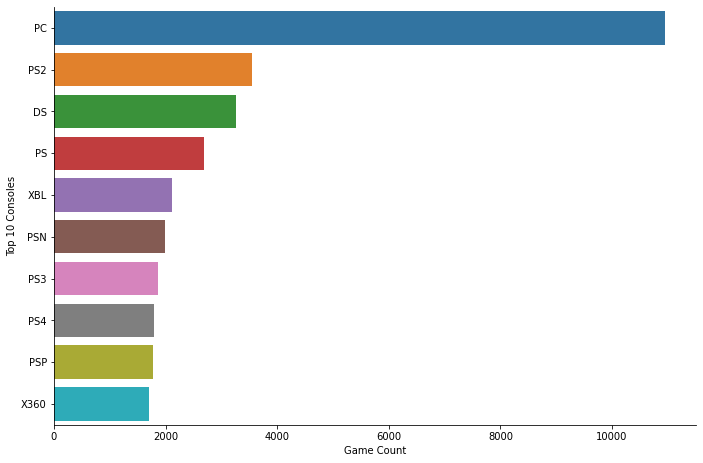

In [22]:
console_plot = sns.catplot(data = console_count, x='counts', y = 'Console Name', kind='bar', orient='h' )
console_plot.fig.set_size_inches(10.5, 6.5)
console_plot.set_axis_labels("Game Count", "Top 10 Consoles")

## Number of Games per ESRB Rating

This section counts how many unique video game titles there are that have the same ESRB rating. ESRB (Entertainment Software Rating Board) is a self-regulatory organization that provides age-restriction ratings for video games. They have multiple rating levels, each corresponding to a certain age. In this dataset, there are 8 ratings used.

- E (Everyone)
- T (Teen)
- M (Mature)
- E10 (Everyone 10)
- RP (Rating Pending)
- EC (Early Childhood)
- AO (Adult Only)
- KA (Kids to Adults) (Not Used anymore)

These ratings are supposedly used to restrict certain age groups from buying certain games with possibly harmful themes. 

It can be seen in the graph below that majority of the games are rated E followed by T then M.

In [23]:
esrbToCount = df_merged[['title', 'ESRB_Rating']]
esrbToCount = esrbToCount.groupby(["ESRB_Rating"], as_index=False)['title'].nunique()
esrbToCount.rename(columns={'ESRB_Rating': 'ESRB Rating', 'title':'Count'}, inplace=True)

esrbToCount = esrbToCount.sort_values(by="Count", ascending=False)

esrbToCount

,ESRB Rating,Count
1,E,6590
7,T,3578
5,M,1640
2,E10,1366
6,RP,197
3,EC,41
0,AO,16
4,KA,3


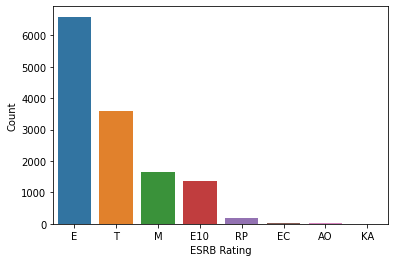

In [24]:
esrbtoCount_plot =  sns.barplot(data = esrbToCount, x = "ESRB Rating", y = "Count")

## Number of Games per Genre

Here we show the number of games each game genre has. It can be seen that the top 5 genres are miscellanious, action, adventure, role-playing, and sports. Action and adventure games are dominant in the gaming industry. Games such as Doom, Minecraft, and World of Warcraft are some games that fall under these genre. These are some classic titles that have survived years of playing. Their high popularity has lead other game development companies to produce such games as well which gave rise to more games being developed under the same genre. 

In [25]:
genre_count = df_merged[['title', 'genre']]
genre_count = genre_count.groupby(["genre"], as_index=False)['title'].nunique()
genre_count.rename(columns={'genre': 'Genre', 'title':'Count'}, inplace=True)

genre_count = genre_count.sort_values(by="Count", ascending=False)

genre_count

,Genre,Count
7,Misc,6825
0,Action,5010
2,Adventure,3857
13,Role-Playing,3321
17,Sports,3103
15,Shooter,2917
18,Strategy,2618
11,Puzzle,2361
16,Simulation,2156
10,Platform,2003


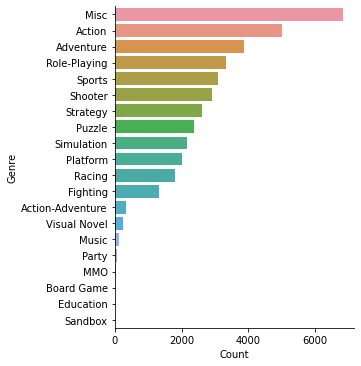

In [26]:
genre_plot = sns.catplot(data = genre_count, x = 'Count', y = 'Genre', orient='h', kind="bar")

## Total Sales per ESRB Rating

This section shows the ESRB Rating that has the most sales. It can be seen that the Mature rating has the top total sales followed by T and E. Majority of mature games comrpise genres such as action, adventure, shooter, and strategy.

In [27]:
esrbToTotal = df_merged[['title', 'ESRB_Rating', 'Total_Sales']]

esrbToTotal

,title,ESRB_Rating,Total_Sales
0,Grand Theft Auto,M,310.0
1,Call of Duty,T,300.0
2,The Sims,T,200.0
3,Minecraft,NaN,200.0
4,Tetris,E,171.0
...,...,...,...
55840,WILL: A Wonderful World,NaN,NaN
55841,Without Within,NaN,NaN
55842,Without Within 2,NaN,NaN
55843,Without Within 3,NaN,NaN


In [28]:
esrbToTotal['Total_Sales'].describe()

count    21398.000000
mean         0.728295
std          5.080270
min          0.000000
25%          0.040000
50%          0.140000
75%          0.430000
max        310.000000
Name: Total_Sales, dtype: float64

### **Checking sales of AO and KA

In [29]:
esrbToTotal_a = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('AO') == True]

esrbToTotal_a = esrbToTotal_a.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_a

,ESRB_Rating,Total_Sales
0,AO,0.0


In [30]:
esrbToTotal_b = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('KA') == True]

esrbToTotal_b = esrbToTotal_b.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_b

,ESRB_Rating,Total_Sales
0,KA,0.0


### Plotting for ESRB to Total Sales

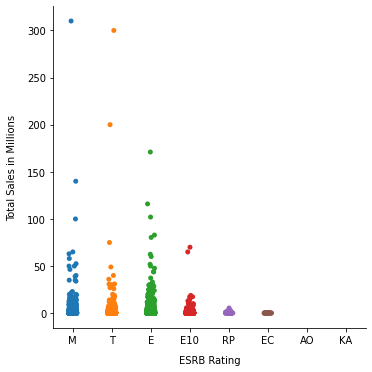

In [31]:
ESRB_sales_plot = sns.catplot(y = 'Total_Sales', x = 'ESRB_Rating', data=esrbToTotal)
ESRB_sales_plot.set_axis_labels("ESRB Rating", "Total Sales in Millions", labelpad=10)

## Top 20 Genres and their Total Sales

In this section we show the top 20 genre and their total sales. The top 3 genres are shooter, sports, and action. These results are not surprising since franchises such as Call of Duty series, FIFA/2K series, or the BioShock series have been popular titles in their own genres. They have been releasing multiple titles under the same name which has lead to a hardcore following where fans keep buying the next series. This further increases the popularity of the genre which leads to even more games being developed in order to lure these fans to other games of the same genre. 

In [32]:
df_merged['genre'].describe()

count     55845
unique       20
top        Misc
freq       9153
Name: genre, dtype: object

In [33]:
df_merged['genre'].unique()

array(['Action-Adventure', 'Shooter', 'Simulation', 'Sandbox', 'Puzzle',
       'Role-Playing', 'Sports', 'Racing', 'Platform', 'Music',
       'Education', 'Fighting', 'Party', 'Strategy', 'Misc', 'Action',
       'MMO', 'Adventure', 'Visual Novel', 'Board Game'], dtype=object)

In [34]:
genre_sales =  df_merged.groupby(['genre'], as_index=False)['Total_Sales'].sum()
genre_sales = genre_sales.sort_values('Total_Sales', ascending=False)
genre_sales

,genre,Total_Sales
15,Shooter,2153.19
17,Sports,1900.60
0,Action,1625.59
13,Role-Playing,1459.26
1,Action-Adventure,1414.05
10,Platform,1337.82
12,Racing,965.54
7,Misc,942.03
16,Simulation,827.69
5,Fighting,746.69


In [35]:
total_per_genre = genre_sales['Total_Sales']

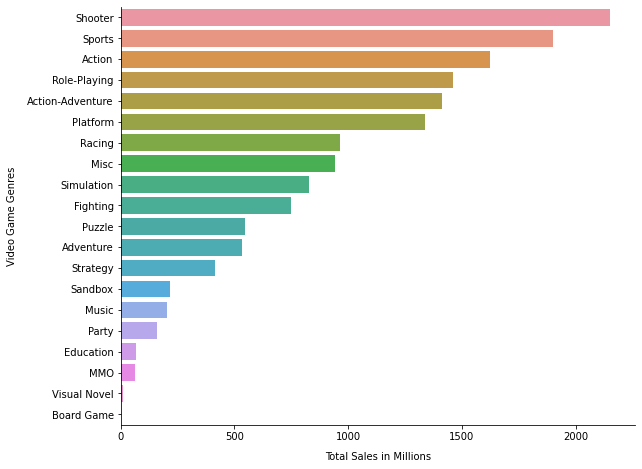

In [36]:
genre_sales_plot = sns.catplot(y = 'genre', x = 'Total_Sales', data=genre_sales, orient='h', kind='bar')
genre_sales_plot.fig.set_size_inches(10.5, 6.5)
genre_sales_plot.set_axis_labels("Total Sales in Millions", "Video Game Genres", labelpad=10)

## Console To Total Sales of Games***Check

This section shows the total sales for the top 10 consoles. Series takes the lead followed by PS2, PC, then Xbox360. (IDK if series should be removed, series kasi are game titles with multiple console releases, so halo siya)

In [37]:
df_merged['console'].describe()

count     55845
unique       77
top          PC
freq      10954
Name: console, dtype: object

In [38]:
df_merged['console'].unique()

array(['Series', 'Wii', 'NES', 'PC', 'DS', 'GB', 'NS', 'X360', 'SNES',
       'PS3', 'PS4', '3DS', 'PS2', 'GEN', 'N64', 'PS', 'XOne', 'WiiU',
       'XB', 'PSP', '2600', 'GC', 'GBA', 'GBC', 'PSN', 'PSV', 'DC', 'XBL',
       'SAT', 'SCD', 'WS', 'Amig', 'VC', 'NG', 'WW', 'PCE', '3DO', 'GG',
       'OSX', 'Mob', 'PCFX', 'XSX', 'PS5', '5200', 'Int', 'And', 'WinP',
       'Linux', 'NGage', 'ACPC', 'Arc', 'AST', 'ZXS', 'C64', 'MS', 'S32X',
       'Lynx', '7800', 'ApII', 'MSX', 'DSiW', 'DSi', 'FMT', 'MSD', 'AJ',
       'iQue', 'iOS', 'GIZ', 'BRW', 'VB', 'Ouya', 'TG16', 'C128', 'CDi',
       'CD32', 'BBCM', 'Aco'], dtype=object)

In [39]:
console_sales =  df_merged.groupby(['console'], as_index=False)['Total_Sales'].sum()
console_sales = console_sales.sort_values(ascending=False, by=['Total_Sales'])
console_sales = console_sales.drop(60)
console_sales[0:10]

,console,Total_Sales
49,PS2,1255.53
45,PC,1180.15
69,X360,983.18
50,PS3,965.74
66,Wii,894.43
20,DS,741.34
48,PS,728.32
51,PS4,692.25
72,XOne,298.87
54,PSP,298.38


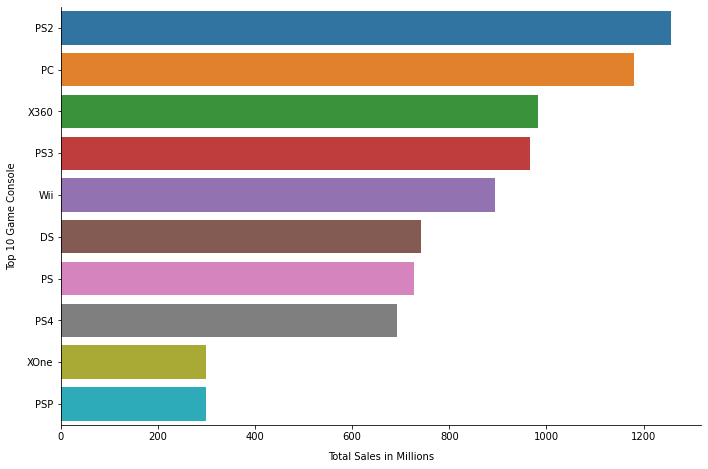

In [40]:
console_sales_plot = sns.catplot(y = 'console', x = 'Total_Sales', data=console_sales[0:10], orient='h', kind='bar')
console_sales_plot.fig.set_size_inches(10.5, 6.5)
console_sales_plot.set_axis_labels("Total Sales in Millions", "Top 10 Game Console", labelpad=10)

## Total Sales of the Top 20 Games for all Consoles

This section shows the top 20 game total sales for all consoles. Grand Theft Auto takes the lead followed by Call of Duty, then Minecraft. These games have been published on multiple different consoles such as PC, Play Stations, Xbox, Phones etc. This has lead to more sales on the different platforms which helped reach different people who own different consoles. Having more releases on different consoles allows to have more sales since it gives people options on where to play the game. This is especially true for non-PC users who may not have a strong enough computer to run said games. Consoles are made to run these games hence such sales.

In [41]:
title_total = df_merged[['title', 'Total_Sales', 'console']]

title_total

,title,Total_Sales,console
0,Grand Theft Auto,310.0,Series
1,Call of Duty,300.0,Series
2,The Sims,200.0,Series
3,Minecraft,200.0,Series
4,Tetris,171.0,Series
...,...,...,...
55840,WILL: A Wonderful World,NaN,PC
55841,Without Within,NaN,PC
55842,Without Within 2,NaN,PC
55843,Without Within 3,NaN,PC


In [42]:
title_total_sum = title_total.groupby(["title", 'console'], as_index=False)['Total_Sales'].sum()
title_total_sum = title_total_sum.sort_values(by='Total_Sales', ascending=False)
title_total_sum = title_total_sum.nlargest(20, 'Total_Sales')
title_total_sum

,title,console,Total_Sales
19158,Grand Theft Auto,Series,310.00
7367,Call of Duty,Series,300.00
29126,Minecraft,Series,200.00
48607,The Sims,Series,200.00
46721,Tetris,Series,171.00
16389,Final Fantasy,Series,152.50
3286,Assassin's Creed,Series,140.00
53300,Wii Sports,Series,115.99
48010,The Legend of Zelda,Series,107.07
35891,Pro Evolution Soccer,Series,106.80


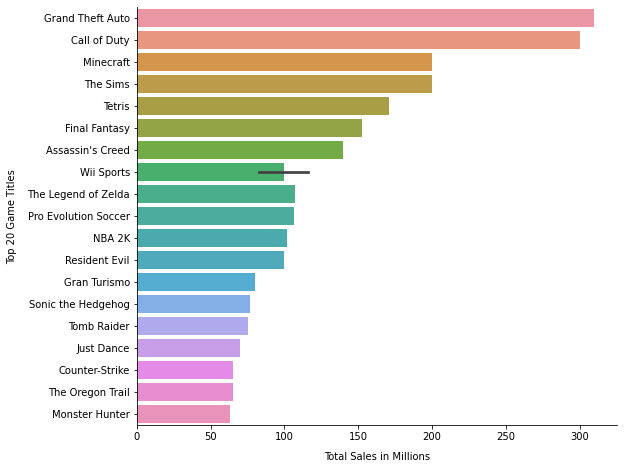

In [43]:
title_total_plot = sns.catplot(data = title_total_sum, x = "Total_Sales", y = "title", kind="bar", orient = 'h')
title_total_plot.fig.set_size_inches(10.5, 6.5)
title_total_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles", labelpad=10)

## Top 10 Games Per Region

This section shows the top 10 games according to their total sales per region. For the NA graph, the games that showed up are understandable since NA is more into the shooter, action, adventure genre of games such as Grand Theft Auto and Call of Duty. These game titles have been popular in NA for quite some time now. For the JP graph, these are games mostly developed and released in Japan hence it has more japanese sales. Grand Theft Auto can be seen within the chart but the other Japanese games are still dominating the region. For PAL on the other hand, it is similar to the interests of the NA region except for the dominance of the sports genre, especially FIFA. FIFA holds a big portion of sales within the PAL region. The sports genre is famous around the European, South American, and South African areas, hence the growth of the sports genre in the region. Lastly, for the other regions, it is similar to the trends for the NA region with shooters and action games taking a big portion of the top 10. 

Overall, titles such as Grand Theft Auto and Call of Duty have been consistent in the 4 provided regions. Which can also explain the amount of sales genres like shooters and action are getting. These games have a big following all throughout the world. 

In [44]:
region_sales = df_merged[['title', 'na_sales','jp_sales','pal_sales','other_sales']]

region_sales

,title,na_sales,jp_sales,pal_sales,other_sales
0,Grand Theft Auto,NaN,NaN,NaN,NaN
1,Call of Duty,NaN,NaN,NaN,NaN
2,The Sims,NaN,NaN,NaN,NaN
3,Minecraft,NaN,NaN,NaN,NaN
4,Tetris,NaN,NaN,NaN,NaN
...,...,...,...,...,...
55840,WILL: A Wonderful World,NaN,NaN,NaN,NaN
55841,Without Within,NaN,NaN,NaN,NaN
55842,Without Within 2,NaN,NaN,NaN,NaN
55843,Without Within 3,NaN,NaN,NaN,NaN


In [45]:
region_sales_na = region_sales.groupby(["title"], as_index=False)['na_sales'].sum()
region_sales_na = region_sales_na.sort_values(by='na_sales', ascending=False)
region_sales_na = region_sales_na.nlargest(20, 'na_sales')
region_sales_na

,title,na_sales
12707,Grand Theft Auto V,26.19
4863,Call of Duty: Black Ops,17.65
4875,Call of Duty: Modern Warfare 3,15.57
4872,Call of Duty: Ghosts,15.06
4869,Call of Duty: Black Ops II,14.12
4874,Call of Duty: Modern Warfare 2,13.54
4868,Call of Duty: Black Ops 3,12.82
12702,Grand Theft Auto IV,11.60
12962,Guitar Hero III: Legends of Rock,11.14
4862,Call of Duty: Advanced Warfare,10.66


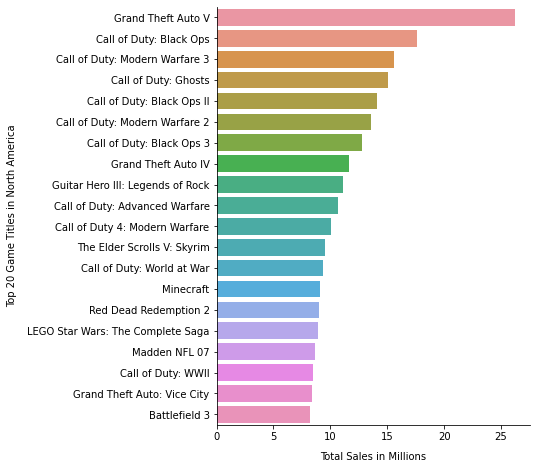

In [46]:
region_sales_na_plot = sns.catplot(data = region_sales_na, x = "na_sales", y = "title", kind="bar", orient = 'h')
region_sales_na_plot.fig.set_size_inches(10.5, 6.5)
region_sales_na_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles in North America", labelpad=10)

In [47]:
region_sales_jp = region_sales.groupby(["title"], as_index=False)['jp_sales'].sum()
region_sales_jp = region_sales_jp.sort_values(by='jp_sales', ascending=False)
region_sales_jp = region_sales_jp.nlargest(20, 'jp_sales')
region_sales_jp

,title,jp_sales
14287,Hot Shots Golf,4.26
36109,Yokai Watch 2: Psychic Specters,2.69
19514,Minecraft,2.50
36279,Yu-Gi-Oh: Duel Monsters 4,2.17
24522,R.B.I. Baseball,2.05
7725,Derby Stallion,2.05
10474,Famista '89 - Kaimaku Han!!,2.05
10848,Final Fantasy XIII,1.88
8878,Dragon Quest XI,1.82
30103,Super Puyo Puyo,1.69


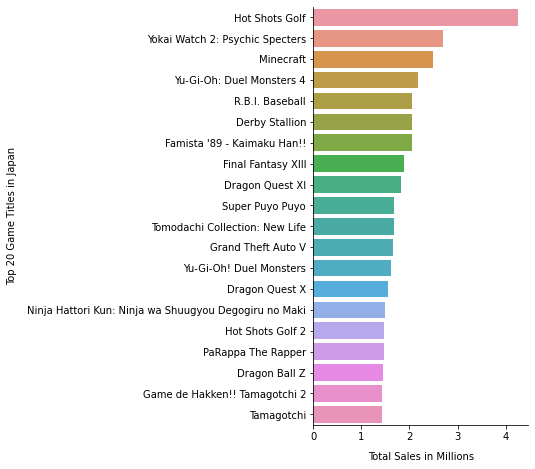

In [48]:
region_sales_jp_plot = sns.catplot(data = region_sales_jp, x = "jp_sales", y = "title", kind="bar", orient = 'h')
region_sales_jp_plot.fig.set_size_inches(20.5, 6.5)
region_sales_jp_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles in Japan", labelpad=10)

In [49]:
region_sales_pal = region_sales.groupby(["title"], as_index=False)['pal_sales'].sum()
region_sales_pal = region_sales_pal.sort_values(by='pal_sales', ascending=False)
region_sales_pal = region_sales_pal.nlargest(20, 'pal_sales')
region_sales_pal

,title,pal_sales
12707,Grand Theft Auto V,28.14
10210,FIFA 15,12.45
10209,FIFA 14,12.14
10213,FIFA 17,12.07
10214,FIFA 18,11.78
4875,Call of Duty: Modern Warfare 3,11.26
4869,Call of Duty: Black Ops II,11.08
10212,FIFA 16,10.56
10208,FIFA 13,10.11
4868,Call of Duty: Black Ops 3,9.76


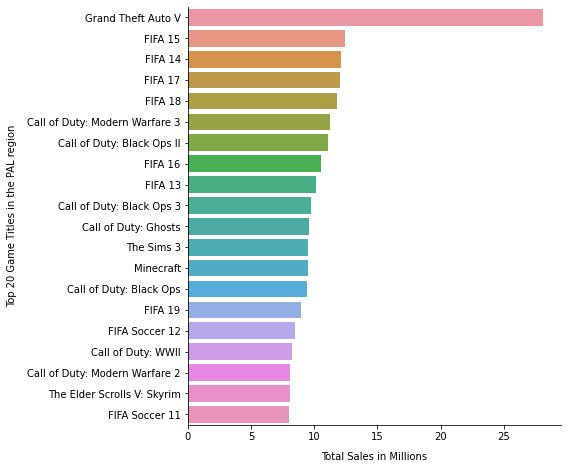

In [50]:
region_sales_pal_plot = sns.catplot(data = region_sales_pal, x = "pal_sales", y = "title", kind="bar", orient = 'h')
region_sales_pal_plot.fig.set_size_inches(10.5, 6.5)
region_sales_pal_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles in the PAL region", labelpad=10)

In [51]:
region_sales_other = region_sales.groupby(["title"], as_index=False)['other_sales'].sum()
region_sales_other = region_sales_other.sort_values(by='other_sales', ascending=False)
region_sales_other = region_sales_other.nlargest(20, 'other_sales')
region_sales_other

,title,other_sales
12707,Grand Theft Auto V,8.32
4869,Call of Duty: Black Ops II,3.67
4872,Call of Duty: Ghosts,3.65
4868,Call of Duty: Black Ops 3,3.63
10233,FIFA Soccer 08,3.53
23978,Pro Evolution Soccer 2008,3.51
4863,Call of Duty: Black Ops,3.31
4875,Call of Duty: Modern Warfare 3,3.26
19514,Minecraft,2.96
4874,Call of Duty: Modern Warfare 2,2.95


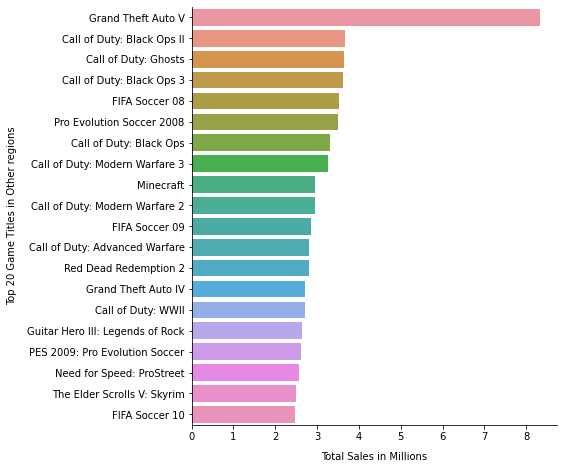

In [52]:
region_sales_other_plot = sns.catplot(data = region_sales_other, x = "other_sales", y = "title", kind="bar", orient = 'h')
region_sales_other_plot.fig.set_size_inches(10.5, 6.5)
region_sales_other_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles in Other regions", labelpad=10)

## Critic Score and User Score Relationship

With this, there is not enough data to create a solid analysis on the relationship of critic/user score towards game sales since the ratings vary even with high/low selling games. One observation is that on average, users score games higher compared to critic scores. This is evident in the games above the top 50. The games in the top 50 seem to have higher critic scores than user scores. Though the scores for some games may be high, they do not show a lot of game sales. This needs to be validated by seeing how many critics or users scored that specific game to see how the scale is tipped.

In [53]:
crit_user_score = df_merged[['title', 'Total_Sales','critic_score','user_score' ]]

crit_user_score

,title,Total_Sales,critic_score,user_score
0,Grand Theft Auto,310.0,NaN,NaN
1,Call of Duty,300.0,NaN,NaN
2,The Sims,200.0,NaN,NaN
3,Minecraft,200.0,NaN,NaN
4,Tetris,171.0,NaN,NaN
...,...,...,...,...
55840,WILL: A Wonderful World,NaN,NaN,NaN
55841,Without Within,NaN,NaN,NaN
55842,Without Within 2,NaN,NaN,NaN
55843,Without Within 3,NaN,NaN,NaN


In [54]:
crit_user_score = crit_user_score.dropna(how='any',axis=0) 

crit_user_score[150:200]

,title,Total_Sales,critic_score,user_score
3396,Resonance of Fate,0.74,7.5,8.2
3414,Star Ocean: The Last Hope International,0.73,8.1,9.5
3484,Silent Hill 3,0.71,8.4,9.0
3626,The Last Remnant,0.68,6.5,8.0
3796,New Play Control! Pikmin,0.64,7.7,9.3
3807,Phantasy Star Portable,0.64,7.1,9.1
3860,Okami,0.63,9.4,9.0
3908,Red Steel 2,0.62,7.8,8.5
3948,Metroid Prime: Trilogy,0.61,9.0,9.6
4009,Okami,0.60,9.0,9.6


In [55]:
crit_user_score.describe()

,Total_Sales,critic_score,user_score
count,221.000000,221.000000,221.000000
mean,3.483937,8.145249,8.553394
std,6.140744,1.185111,1.121991
min,0.000000,3.500000,3.000000
25%,0.550000,7.500000,8.000000
50%,1.330000,8.200000,8.800000
75%,3.640000,9.100000,9.300000
max,40.240000,10.000000,10.000000


## Top 20 Publishers with Most Total Sales

This section shows the top 20 publishers who have the most total sales. The top 5 publishers are Nintendo, Activision, Electronic Arts, Ubisoft, and Sony Computer Entertainment. These are some typical big names in the gaming industry who have been publishing and developing successful games for years. Nintendo tops the chart especially with games such as Wii Sports, Legend of Zelda, and Super Mario Brothers which have been considered as classic games already. Activision is the company that developed the most famous shooter title, Call of Duty. It has received multiple titles and sequels and has been constantly been gaining popularity around the world. Electronic Arts is a more diverse company by publishing different kinds of game genres. From games such as The Sims, to Command and Conquer, to FIFA. A wide variety of games are being published and have been successful over the years. Ubisoft is famous for their open world action games such as Assassins Creed, Far Cry, and the Tom Clancy Series which have been staple action adventure games. Lastly, Sony Computer Entertainment are known of publishing Play Station exclusive games which means you can only play those games on the Play Station. Majority of these games have done well and has getting sales even if they are Play Station exclusives. These top 5 publishers each have their own niche or stand out point in the market and they are using that to stay relevant in this competative field.

In [56]:
publisherSales = df_merged[['publisher','Total_Sales','title']].copy()
publisherSales

,publisher,Total_Sales,title
0,ASC Games,310.0,Grand Theft Auto
1,Activision,300.0,Call of Duty
2,Electronic Arts,200.0,The Sims
3,Mojang,200.0,Minecraft
4,Unknown,171.0,Tetris
...,...,...,...
55840,AGM Playism,NaN,WILL: A Wonderful World
55841,InvertMouse,NaN,Without Within
55842,InvertMouse,NaN,Without Within 2
55843,InvertMouse,NaN,Without Within 3


In [57]:
publisherSales = publisherSales.groupby(["publisher"], as_index=False)['Total_Sales'].sum()
publisherSales = publisherSales.sort_values(by='Total_Sales', ascending=False)
publisherSales = publisherSales.nlargest(20, 'Total_Sales')
publisherSales

,publisher,Total_Sales
1882,Nintendo,2428.18
93,Activision,1080.04
790,Electronic Arts,966.40
2825,Ubisoft,892.95
2490,Sony Computer Entertainment,792.68
446,Capcom,574.61
2363,Sega,530.63
753,EA Sports,522.04
1461,Konami,498.89
2841,Unknown,491.07


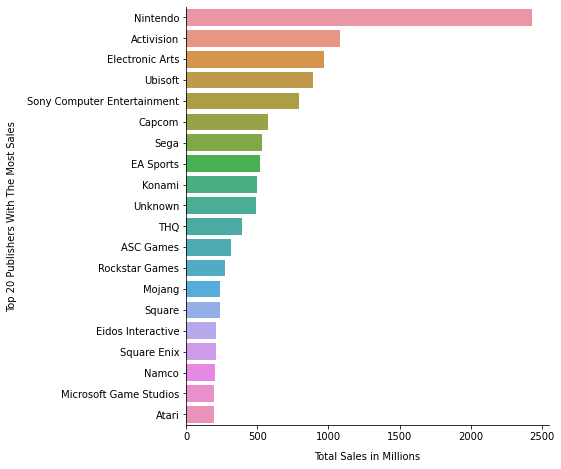

In [58]:
publisherSalesPlot = sns.catplot(data = publisherSales, x = "Total_Sales", y = "publisher", kind="bar", orient = 'h')
publisherSalesPlot.fig.set_size_inches(10.5, 6.5)
publisherSalesPlot.set_axis_labels("Total Sales in Millions", "Top 20 Publishers With The Most Sales", labelpad=10)

In [59]:
publisherGames = df_merged[['publisher','Total_Sales','title']].copy()
publisherGames = publisherGames.groupby(["publisher"], as_index=False)

publisherGames.get_group('Nintendo')

,publisher,Total_Sales,title
7,Nintendo,115.99,Wii Sports
8,Nintendo,107.07,The Legend of Zelda
12,Nintendo,82.90,Wii Sports
20,Nintendo,62.55,Donkey Kong
21,Nintendo,60.08,Super Smash Bros.
...,...,...,...
54947,Nintendo,NaN,PictureBook Games: The Royal Bluff
55228,Nintendo,NaN,Speed Battle Custom: Card Hero
55291,Nintendo,NaN,Super Famicom Wars
55292,Nintendo,NaN,Super Famicom Wars


In [60]:
publisherGames.get_group('Activision')

,publisher,Total_Sales,title
1,Activision,300.00,Call of Duty
38,Activision,40.00,Guitar Hero
111,Activision,15.09,Call of Duty: Black Ops 3
123,Activision,14.82,Call of Duty: Modern Warfare 3
124,Activision,14.74,Call of Duty: Black Ops
...,...,...,...
55253,Activision,NaN,Star Trek: Armada
55254,Activision,NaN,Star Trek: Armada II
55376,Activision,NaN,The History Channel - Civil War: The Game
55459,Activision,NaN,Tycoon Collection


In [61]:
publisherGames.get_group('Electronic Arts')

,publisher,Total_Sales,title
2,Electronic Arts,200.00,The Sims
40,Electronic Arts,39.00,Medal of Honor
54,Electronic Arts,30.00,Command & Conquer
171,Electronic Arts,10.94,FIFA 17
213,Electronic Arts,9.15,FIFA 19
...,...,...,...
55179,Electronic Arts,NaN,SimCoaster
55265,Electronic Arts,NaN,Starflight 2: Trade Routes of the Cloud Nebula
55390,Electronic Arts,NaN,The Lord of the Rings: Battle for Middle-Earth...
55391,Electronic Arts,NaN,The Lord of the Rings: Tactics


In [62]:
publisherGames.get_group('Ubisoft')

,publisher,Total_Sales,title
6,Ubisoft,140.0,Assassin's Creed
16,Ubisoft,70.0,Just Dance
25,Ubisoft,52.5,Far Cry
45,Ubisoft,35.0,Tom Clancy's Ghost Recon
49,Ubisoft,31.0,Tom Clancy's Splinter Cell
...,...,...,...
55409,Ubisoft,NaN,The Settlers: Rise of an Empire Gold Edition
55531,Ubisoft,NaN,Warlords Battlecry II
55535,Ubisoft,NaN,Warlords III: Darklords Rising
55559,Ubisoft,NaN,Worms Triple Pack


In [63]:
publisherGames.get_group('Sony Computer Entertainment')

,publisher,Total_Sales,title
13,Sony Computer Entertainment,80.40,Gran Turismo
28,Sony Computer Entertainment,50.00,Crash Bandicoot
44,Sony Computer Entertainment,35.05,God of War
62,Sony Computer Entertainment,26.00,Ratchet & Clank
86,Sony Computer Entertainment,20.00,The Last of Us
...,...,...,...
55584,Sony Computer Entertainment,NaN,Zeus: Carnage Heart Second
55653,Sony Computer Entertainment,NaN,GUNS UP!
55703,Sony Computer Entertainment,NaN,Tokyo Jungle Mobile
55704,Sony Computer Entertainment,NaN,Tokyo Jungle Mobile


## Trend of New Video Games per Genre



In [64]:
trendGames = df_merged
trendGames['release_date'] = pd.to_datetime(trendGames['release_date'], format='%Y-%m-%d')
trendGames = trendGames.loc[trendGames['release_date'].dt.year > 2018]
trendGames

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating,Total_Sales
273,New Super Mario Bros. U Deluxe,NS,Platform,Nintendo,Nintendo EPD,NaN,NaN,6.6,6.60,NaN,NaN,NaN,NaN,NaN,2019-01-11,E,6.60
286,Luigi's Mansion 3,NS,Action-Adventure,Nintendo,"Next Level Games, Inc.",6.0,NaN,NaN,6.33,NaN,NaN,NaN,NaN,NaN,2019-10-31,NaN,6.33
334,Super Mario Maker 2,NS,Platform,Nintendo,Nintendo,NaN,NaN,NaN,5.48,NaN,NaN,NaN,NaN,NaN,2019-06-28,RP,5.48
446,The Legend of Zelda: Link's Awakening,NS,Action-Adventure,Nintendo,Nintendo,8.0,NaN,NaN,4.38,NaN,NaN,NaN,NaN,NaN,2019-09-20,E,4.38
507,The Last of Us: Part II,PS4,Action,Sony Interactive Entertainment,Naughty Dog,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,2020-06-19,NaN,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55836,Tlicolity Eyes: Twinkle Snowtime,NS,Visual Novel,Idea Factory,Idea Factory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-18,NaN,NaN
55837,Variable Barricade,PSV,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-04,NaN,NaN
55838,WILL: A Wonderful World,PS4,Visual Novel,PM Studios,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-26,NaN,NaN
55839,WILL: A Wonderful World,NS,Visual Novel,PM Studios,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-26,NaN,NaN


In [65]:
trendGames0 = trendGames.sort_values(by='Total_Sales', ascending=False)
trendGames0 = trendGames.nlargest(20, 'Total_Sales')
trendGames0

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating,Total_Sales
273,New Super Mario Bros. U Deluxe,NS,Platform,Nintendo,Nintendo EPD,NaN,NaN,6.6,6.60,NaN,NaN,NaN,NaN,NaN,2019-01-11,E,6.60
286,Luigi's Mansion 3,NS,Action-Adventure,Nintendo,"Next Level Games, Inc.",6.0,NaN,NaN,6.33,NaN,NaN,NaN,NaN,NaN,2019-10-31,NaN,6.33
334,Super Mario Maker 2,NS,Platform,Nintendo,Nintendo,NaN,NaN,NaN,5.48,NaN,NaN,NaN,NaN,NaN,2019-06-28,RP,5.48
446,The Legend of Zelda: Link's Awakening,NS,Action-Adventure,Nintendo,Nintendo,8.0,NaN,NaN,4.38,NaN,NaN,NaN,NaN,NaN,2019-09-20,E,4.38
507,The Last of Us: Part II,PS4,Action,Sony Interactive Entertainment,Naughty Dog,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,2020-06-19,NaN,4.00
591,Final Fantasy VII Remake,PS4,Role-Playing,Square Enix,Square Enix,9.0,NaN,NaN,3.50,NaN,NaN,NaN,NaN,NaN,2020-04-10,NaN,3.50
705,Space Engineers,PC,Simulation,Keen Software House,Keen Software House,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,2019-02-28,NaN,3.00
757,Fire Emblem: Three Houses,NS,Role-Playing,Nintendo,Intelligent Systems,8.0,NaN,10.0,2.87,NaN,NaN,NaN,NaN,NaN,2019-07-26,RP,2.87
890,The Outer Worlds,Series,Role-Playing,Private Division,Obsidian Entertainment,NaN,NaN,NaN,2.50,NaN,NaN,NaN,NaN,NaN,2019-10-25,NaN,2.50
2259,Slay the Spire,PC,Strategy,Mega Crit Games,Mega Crit Games,NaN,NaN,NaN,1.12,NaN,NaN,NaN,NaN,NaN,2019-01-23,NaN,1.12


In [66]:
#trendConsole = trendGames.groupby(["console"], as_index=False)['Total_Sales'].sum()
#trendConsole = trendConsole.sort_values(by='Total_Sales', ascending=False)
#trendConsole = trendConsole.nlargest(20, 'Total_Sales')
#trendConsole
trendConsoleGenre = trendGames.groupby(["genre"])['na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'global_sales'].sum()
trendConsoleGenre.reset_index(level=0, inplace=True)
trendConsoleGenre.rename(columns={"genre": "Genre",}, inplace=True)

genreCount = pd.DataFrame(trendGames['genre'].value_counts())
genreCount.reset_index(level=0, inplace=True)
genreCount.rename(columns={"genre": "Counts","index":"Genre"}, inplace=True)

genre=pd.merge(trendConsoleGenre,genreCount,on="Genre")
trendConsoleGenre

<ipython-input-66-90ccab472b4d>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trendConsoleGenre = trendGames.groupby(["genre"])['na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'global_sales'].sum()


,Genre,na_sales,pal_sales,jp_sales,other_sales,global_sales
0,Action,0.0,0.00,0.16,0.00,0.16
1,Action-Adventure,0.0,0.00,0.31,0.00,0.31
2,Adventure,0.0,0.08,0.29,0.01,0.38
3,Board Game,0.0,0.00,0.00,0.00,0.00
4,Education,0.0,0.00,0.00,0.00,0.00
5,Fighting,0.0,0.00,0.00,0.00,0.00
6,MMO,0.0,0.00,0.00,0.00,0.00
7,Misc,0.0,0.00,0.02,0.00,0.02
8,Music,0.0,0.00,0.00,0.00,0.00
9,Party,0.0,0.00,0.00,0.00,0.00


In [67]:
final_table = genre[["Genre","na_sales","pal_sales","jp_sales","other_sales","global_sales"]]
final_table = final_table.rename(columns = {"na_sales": "North America", 
                                  "pal_sales":"PAL Region", 
                                  "jp_sales": "Japan","other_sales":"Other","global_sales":"Total"})
final_table.reset_index(drop=True)
final_table

,Genre,North America,PAL Region,Japan,Other,Total
0,Action,0.0,0.00,0.16,0.00,0.16
1,Action-Adventure,0.0,0.00,0.31,0.00,0.31
2,Adventure,0.0,0.08,0.29,0.01,0.38
3,Board Game,0.0,0.00,0.00,0.00,0.00
4,Education,0.0,0.00,0.00,0.00,0.00
5,Fighting,0.0,0.00,0.00,0.00,0.00
6,MMO,0.0,0.00,0.00,0.00,0.00
7,Misc,0.0,0.00,0.02,0.00,0.02
8,Music,0.0,0.00,0.00,0.00,0.00
9,Party,0.0,0.00,0.00,0.00,0.00


In [68]:
final_table = final_table.loc[(final_table.sum(axis=1) != 0), (final_table.sum(axis=0) != 0)]
final_table

,Genre,PAL Region,Japan,Other,Total
0,Action,0.00,0.16,0.00,0.16
1,Action-Adventure,0.00,0.31,0.00,0.31
2,Adventure,0.08,0.29,0.01,0.38
7,Misc,0.00,0.02,0.00,0.02
10,Platform,0.00,0.04,0.00,0.04
11,Puzzle,0.00,0.03,0.00,0.03
13,Role-Playing,0.00,1.72,0.00,1.72
19,Visual Novel,0.00,0.06,0.00,0.06


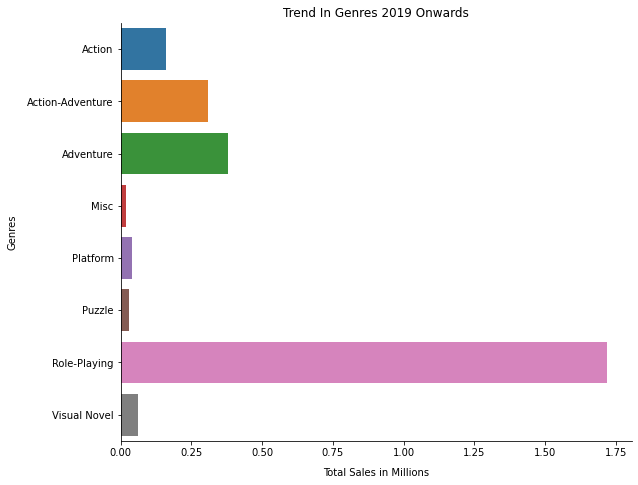

In [69]:
publisherSalesPlot = sns.catplot(data = final_table, x = "Total",
                                 y = "Genre", 
                                 kind="bar", 
                                 orient = 'h').set(title='Trend In Genres 2019 Onwards')
publisherSalesPlot.fig.set_size_inches(10.5, 6.5)
publisherSalesPlot.set_axis_labels("Total Sales in Millions", "Genres", labelpad=10)


## Top Genres for Mature, Teen, Everyone ESRB Ratings

This section shows the genmre of games popular for the top 3 ESRB ratings (Mature, Teen, and Everyone). For the everyone rating, famous genres are sports, miscellanous, puzzle, and racing games. These kinds of games are definitely for any age since they do not contain much violence, gore, or suggestive themes. These kinds of games stay true to their genre and replicate what they are trying to copy. Sports games like FIFA and 2K stay true to the rules of the sport. Racing games are focused on the racing aspect of the game, while puzzles are focused on the thinking aspect of games. For Teen and Mature, they have similar Top 3 genres which are role-playing, action, and shooter. These games now tend to have violence and sensitive themes within the game hence for such rating. The difference between the two are in the top 4 and 5. Teen has more fighting and strategy games. These games have mild violence only. Fighting games are just people punching or hurting one another while strategy games are mostly destruction based objectives. 

In [70]:
genre_esrb = df_merged[['title', 'genre','ESRB_Rating']]
genre_esrb = genre_esrb.groupby('ESRB_Rating')

genre_esrb.first()

,title,genre
ESRB_Rating,,
AO,Cat Girl Alliance,Adventure
E,Tetris,Puzzle
E10,Just Dance,Music
EC,Blue's Clues: Blue's Big Musical,Misc
KA,Power Move Pro Wrestling,Fighting
M,Grand Theft Auto,Action-Adventure
RP,Super Mario Maker 2,Platform
T,Call of Duty,Shooter


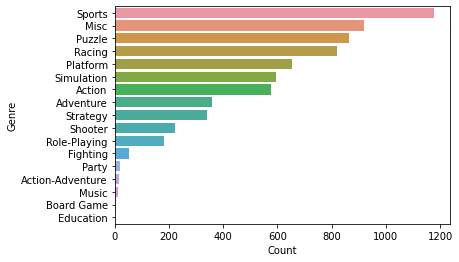

In [71]:
genre_E = genre_esrb.get_group('E')

genre_E = genre_E.groupby(["genre"], as_index=False)['title'].nunique()
genre_E.rename(columns={'genre': 'Genre', 'title':'Count'}, inplace=True)

genre_E = genre_E.sort_values(by="Count", ascending=False)

genre_E_plot =  sns.barplot(data = genre_E, x="Count", y="Genre", orient='h')

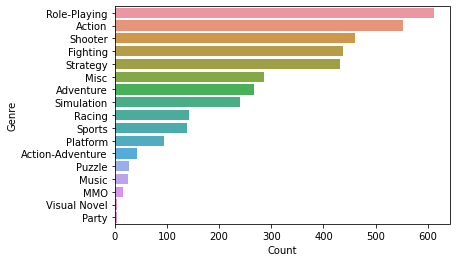

In [72]:
genre_T = genre_esrb.get_group('T')

genre_T = genre_T.groupby(["genre"], as_index=False)['title'].nunique()
genre_T.rename(columns={'genre': 'Genre', 'title':'Count'}, inplace=True)

genre_T = genre_T.sort_values(by="Count", ascending=False)

genre_T_plot =  sns.barplot(data = genre_T, x="Count", y="Genre", orient='h')

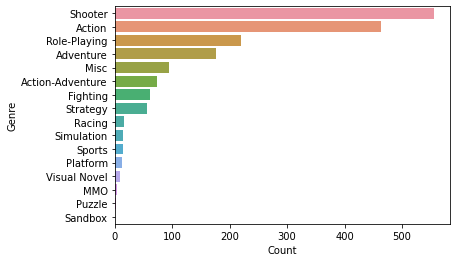

In [73]:
genre_M = genre_esrb.get_group('M')

genre_M = genre_M.groupby(["genre"], as_index=False)['title'].nunique()
genre_M.rename(columns={'genre': 'Genre', 'title':'Count'}, inplace=True)

genre_M = genre_M.sort_values(by="Count", ascending=False)

genre_M_plot =  sns.barplot(data = genre_M, x="Count", y="Genre", orient='h')

## Trending Game Genres per Region

This section shows what game genres are top selling per region. Each region contains their best performing game in terms of sale. This section tries to uncover what genres of games are best preferred by each region, namely: NA, JP, and PAL. This will also include top genres for regions unincluded in the three mentioned and will be as "Other Regions".


### Dataframe for Region Sales


First and foremost, a dataframe of the sales per region with the title of each game and their respective genres are needed.

In [74]:
genre_region_sales = df_merged[['title', 'na_sales','jp_sales','pal_sales','other_sales', 'genre', 'Total_Sales']]

genre_region_sales

,title,na_sales,jp_sales,pal_sales,other_sales,genre,Total_Sales
0,Grand Theft Auto,NaN,NaN,NaN,NaN,Action-Adventure,310.0
1,Call of Duty,NaN,NaN,NaN,NaN,Shooter,300.0
2,The Sims,NaN,NaN,NaN,NaN,Simulation,200.0
3,Minecraft,NaN,NaN,NaN,NaN,Sandbox,200.0
4,Tetris,NaN,NaN,NaN,NaN,Puzzle,171.0
...,...,...,...,...,...,...,...
55840,WILL: A Wonderful World,NaN,NaN,NaN,NaN,Visual Novel,NaN
55841,Without Within,NaN,NaN,NaN,NaN,Visual Novel,NaN
55842,Without Within 2,NaN,NaN,NaN,NaN,Visual Novel,NaN
55843,Without Within 3,NaN,NaN,NaN,NaN,Visual Novel,NaN


After creating a dataframe of the sales, next step would be isolating the game titles. Currently, the dataset is showing all game titles, even duplicates. The duplicates exist because the same Game could have different platforms, an example of this would be "GTA V" which is available on the PC, the Xbox series, and the PlayStation series.

For this question, there is no need to care for duplicate titles as what we are trying to get is simply the total sales of each genre per region. In the next cells we will be creating dataframes for each region with the total region sales per genre.

In [75]:
genre_region_sales_na = genre_region_sales.groupby(["genre"], as_index=False)['na_sales'].sum()
genre_region_sales_na = genre_region_sales_na.sort_values(by='na_sales', ascending=False)
genre_region_sales_na

,genre,na_sales
17,Sports,624.35
0,Action,612.44
15,Shooter,562.55
7,Misc,309.66
12,Racing,276.48
10,Platform,226.30
13,Role-Playing,183.67
5,Fighting,183.30
2,Adventure,164.11
16,Simulation,153.01


In [76]:
genre_region_sales_jp = genre_region_sales.groupby(["genre"], as_index=False)['jp_sales'].sum()
genre_region_sales_jp = genre_region_sales_jp.sort_values(by='jp_sales', ascending=False)
genre_region_sales_jp

,genre,jp_sales
13,Role-Playing,157.26
17,Sports,113.55
0,Action,86.87
7,Misc,63.62
5,Fighting,63.22
2,Adventure,47.03
18,Strategy,41.81
16,Simulation,39.23
10,Platform,36.50
15,Shooter,35.75


In [77]:
genre_region_sales_pal = genre_region_sales.groupby(["genre"], as_index=False)['pal_sales'].sum()
genre_region_sales_pal = genre_region_sales_pal.sort_values(by='pal_sales', ascending=False)
genre_region_sales_pal

,genre,pal_sales
0,Action,357.85
17,Sports,351.11
15,Shooter,336.02
12,Racing,183.92
7,Misc,152.80
10,Platform,119.54
2,Adventure,97.01
13,Role-Playing,95.57
16,Simulation,87.79
5,Fighting,84.37


In [78]:
genre_region_sales_other = genre_region_sales.groupby(["genre"], as_index=False)['other_sales'].sum()
genre_region_sales_other = genre_region_sales_other.sort_values(by='other_sales', ascending=False)
genre_region_sales_other

,genre,other_sales
17,Sports,131.28
0,Action,119.48
15,Shooter,113.06
7,Misc,60.41
12,Racing,57.35
13,Role-Playing,35.94
10,Platform,35.74
2,Adventure,31.57
5,Fighting,30.31
16,Simulation,24.48


### Creating a New Column
After creating a dataframe for each region, placing all of them into a singular dataframe would make it easier to visualize the data. Now, we will be making a new column for each region dataframe called "region" as well as renaming the region - specific sales column to simply "sales". By the end of this section, we will be combining all dataframes into one dataframe

In [79]:
genre_region_sales_na['region'] = 'North America'

genre_region_sales_jp['region'] = 'Japan'

genre_region_sales_pal['region'] = 'Phase Alternating Line'

genre_region_sales_other['region'] = 'Other Regions'

genre_region_sales_na = genre_region_sales_na.rename(columns = {'na_sales':'sales'}, inplace=False)
genre_region_sales_jp = genre_region_sales_jp.rename(columns = {'jp_sales':'sales'}, inplace=False)
genre_region_sales_pal = genre_region_sales_pal.rename(columns = {'pal_sales':'sales'}, inplace=False)
genre_region_sales_other = genre_region_sales_other.rename(columns = {'other_sales':'sales'}, inplace=False)


In [80]:
genre_region_df = pd.concat([genre_region_sales_na, genre_region_sales_jp, genre_region_sales_pal,
                            genre_region_sales_other])

Now that we've cleaned the regional data, we can then plot them.

## Plotting Sales by Genre per Region

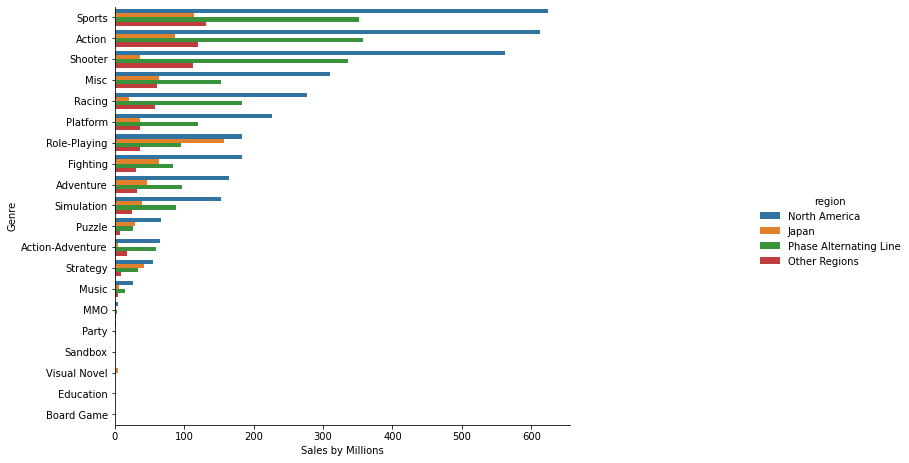

In [81]:
genre_region_plot = sns.catplot(data = genre_region_df, x = "sales", kind="bar", y = "genre", orient = 'h', hue = 'region')
genre_region_plot.fig.set_size_inches(15.5, 6.5)
genre_region_plot.set_axis_labels("Sales by Millions", "Genre")

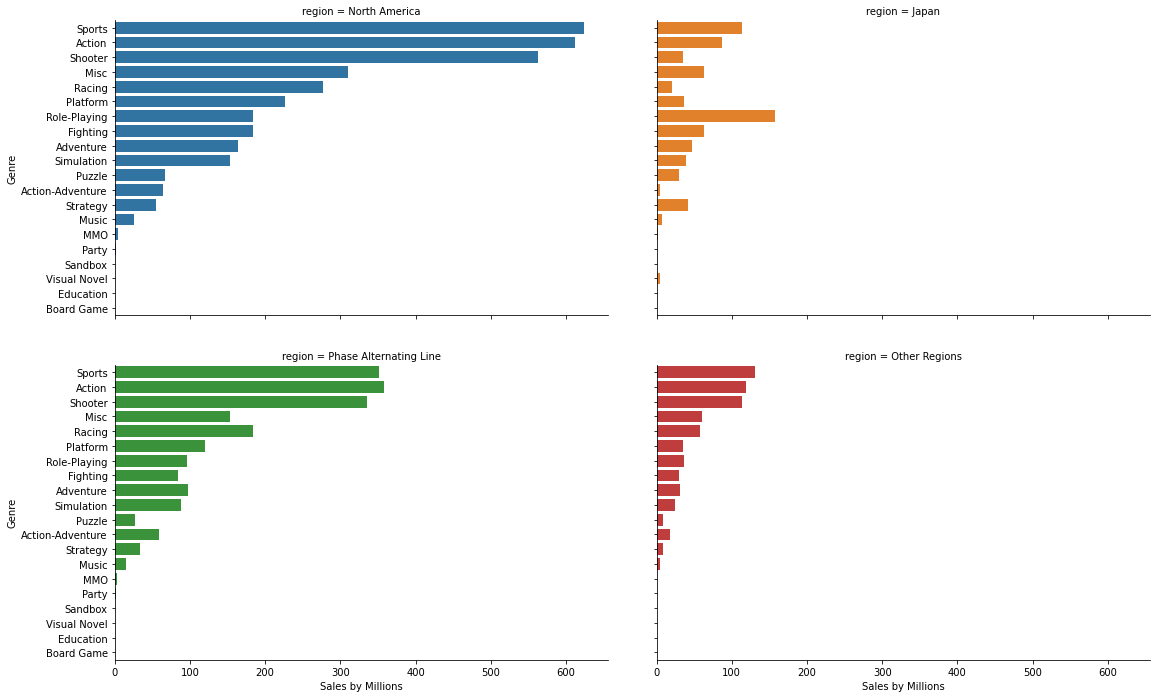

In [82]:
genre_region_facet = sns.FacetGrid(genre_region_df, col="region", col_wrap=2, hue="region", height=3)
genre_region_facet.map(sns.barplot, "sales", "genre", order=genre_region_df['genre'].unique())
genre_region_facet.fig.set_size_inches(20.5, 10.5)
genre_region_facet.set_axis_labels("Sales by Millions", "Genre")

## Comparison of Newer Games to Older Games in Sales

In [83]:
old_new_sales = df_merged[['title', 'release_date','Total_Sales']]
old_new_sales

,title,release_date,Total_Sales
0,Grand Theft Auto,1998-03-27,310.0
1,Call of Duty,2003-10-29,300.0
2,The Sims,2000-02-04,200.0
3,Minecraft,2011-11-18,200.0
4,Tetris,1984-06-06,171.0
...,...,...,...
55840,WILL: A Wonderful World,2017-06-06,NaN
55841,Without Within,2015-01-22,NaN
55842,Without Within 2,2015-11-09,NaN
55843,Without Within 3,2018-05-03,NaN


In [84]:
old_new_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55845 entries, 0 to 55844
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         55845 non-null  object        
 1   release_date  52690 non-null  datetime64[ns]
 2   Total_Sales   21398 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ MB


by looking at the ".info", we can see that there are null values in the release_date section

In [85]:
old_new_sales.release_date.isna().sum()

3155

Since the 3155 is not really much from the dataframe, for this research, we'll opt to remove it as it will not really help in terms of answering the current research question.

In [86]:
old_new_sales.dropna(subset = ["release_date"], inplace=True)
old_new_sales

<ipython-input-86-0d136c339518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_new_sales.dropna(subset = ["release_date"], inplace=True)


,title,release_date,Total_Sales
0,Grand Theft Auto,1998-03-27,310.0
1,Call of Duty,2003-10-29,300.0
2,The Sims,2000-02-04,200.0
3,Minecraft,2011-11-18,200.0
4,Tetris,1984-06-06,171.0
...,...,...,...
55840,WILL: A Wonderful World,2017-06-06,NaN
55841,Without Within,2015-01-22,NaN
55842,Without Within 2,2015-11-09,NaN
55843,Without Within 3,2018-05-03,NaN


In [87]:
old_new_sales.describe()

,Total_Sales
count,20859.000000
mean,0.733762
std,5.136627
min,0.000000
25%,0.040000
50%,0.140000
75%,0.440000
max,310.000000


Since "Total_Sales" contain N/A values, we'll simply fill them with 0s. Doing this should not affect the outcome of the plots in the latter parts.

In [88]:
old_new_sales = old_new_sales.fillna(0)

A new column called "release_year" will be made for easier referencing to the release dates of the games

In [89]:
old_new_sales['release_year'] = old_new_sales['release_date'].dt.year
old_new_sales['release_year'] = pd.to_datetime(old_new_sales['release_year'], format='%Y')

old_new_sales

,title,release_date,Total_Sales,release_year
0,Grand Theft Auto,1998-03-27,310.0,1998-01-01
1,Call of Duty,2003-10-29,300.0,2003-01-01
2,The Sims,2000-02-04,200.0,2000-01-01
3,Minecraft,2011-11-18,200.0,2011-01-01
4,Tetris,1984-06-06,171.0,1984-01-01
...,...,...,...,...
55840,WILL: A Wonderful World,2017-06-06,0.0,2017-01-01
55841,Without Within,2015-01-22,0.0,2015-01-01
55842,Without Within 2,2015-11-09,0.0,2015-01-01
55843,Without Within 3,2018-05-03,0.0,2018-01-01


We first will check the total sales per year within the dataset.

In [90]:
old_new_sales_by_year = old_new_sales.groupby(['release_year'], as_index=False)['Total_Sales'].sum()
old_new_sales_by_year

,release_year,Total_Sales
0,1971-01-01,65.00
1,1973-01-01,0.00
2,1975-01-01,0.00
3,1977-01-01,2.50
4,1978-01-01,6.19
5,1979-01-01,0.31
6,1980-01-01,2.58
7,1981-01-01,93.04
8,1982-01-01,53.39
9,1983-01-01,34.82


Here, we will divide the games into new and old. In terms of New and Old, there are no real indicators of what year is considered old and what year is considered new. For this project, New would be considered 2015 and above, while old would be 1971 to 2014.

In [91]:
new_game_sales = old_new_sales.loc[old_new_sales['release_date'].dt.year > 2014]

new_game_sales

,title,release_date,Total_Sales,release_year
68,Mario Kart 8 Deluxe,2017-04-28,24.77,2017-01-01
87,Tom Clancy's The Division,2016-03-08,20.00,2016-01-01
93,Super Smash Bros. Ultimate,2018-12-07,18.84,2018-01-01
98,Super Mario Odyssey,2017-10-27,17.41,2017-01-01
99,The Legend of Zelda: Breath of the Wild,2017-03-03,17.41,2017-01-01
...,...,...,...,...
55840,WILL: A Wonderful World,2017-06-06,0.00,2017-01-01
55841,Without Within,2015-01-22,0.00,2015-01-01
55842,Without Within 2,2015-11-09,0.00,2015-01-01
55843,Without Within 3,2018-05-03,0.00,2018-01-01


In [92]:
new_game_sales_year = new_game_sales.groupby('release_year', as_index=False)['Total_Sales'].sum()
new_game_sales_year

,release_year,Total_Sales
0,2015-01-01,423.09
1,2016-01-01,378.30
2,2017-01-01,360.20
3,2018-01-01,268.30
4,2019-01-01,42.62
5,2020-01-01,8.80


In [93]:
old_game_sales = old_new_sales.loc[(old_new_sales['release_date'].dt.year <= 2014)]
old_game_sales

,title,release_date,Total_Sales,release_year
0,Grand Theft Auto,1998-03-27,310.0,1998-01-01
1,Call of Duty,2003-10-29,300.0,2003-01-01
2,The Sims,2000-02-04,200.0,2000-01-01
3,Minecraft,2011-11-18,200.0,2011-01-01
4,Tetris,1984-06-06,171.0,1984-01-01
...,...,...,...,...
55758,Sakura Spirit,2014-07-09,0.0,2014-01-01
55759,Sakura Spirit,2014-07-09,0.0,2014-01-01
55760,Shan Gui,2014-08-19,0.0,2014-01-01
55761,Shan Gui,2014-08-19,0.0,2014-01-01


In [94]:
old_game_sales_year = old_game_sales.groupby('release_year', as_index=False)['Total_Sales'].sum()
old_game_sales_year

,release_year,Total_Sales
0,1971-01-01,65.00
1,1973-01-01,0.00
2,1975-01-01,0.00
3,1977-01-01,2.50
4,1978-01-01,6.19
5,1979-01-01,0.31
6,1980-01-01,2.58
7,1981-01-01,93.04
8,1982-01-01,53.39
9,1983-01-01,34.82


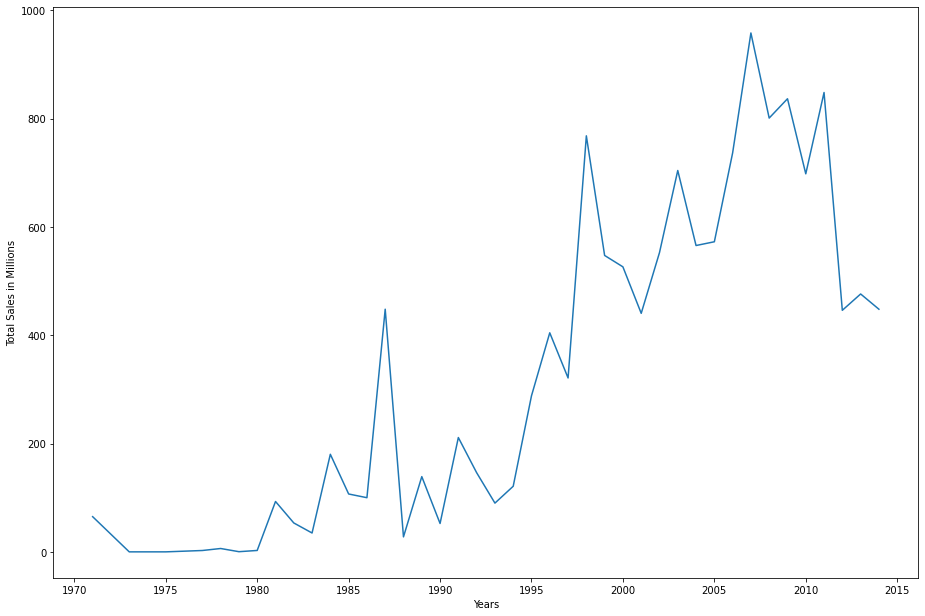

In [136]:
fig, ax = plt.subplots(figsize=(15.5, 10.5))

plt.xlabel("Years")
plt.ylabel("Total Sales in Millions")

old_game_sales_plot = sns.lineplot(data = old_game_sales_year, x = 'release_year', y = 'Total_Sales', ax=ax)


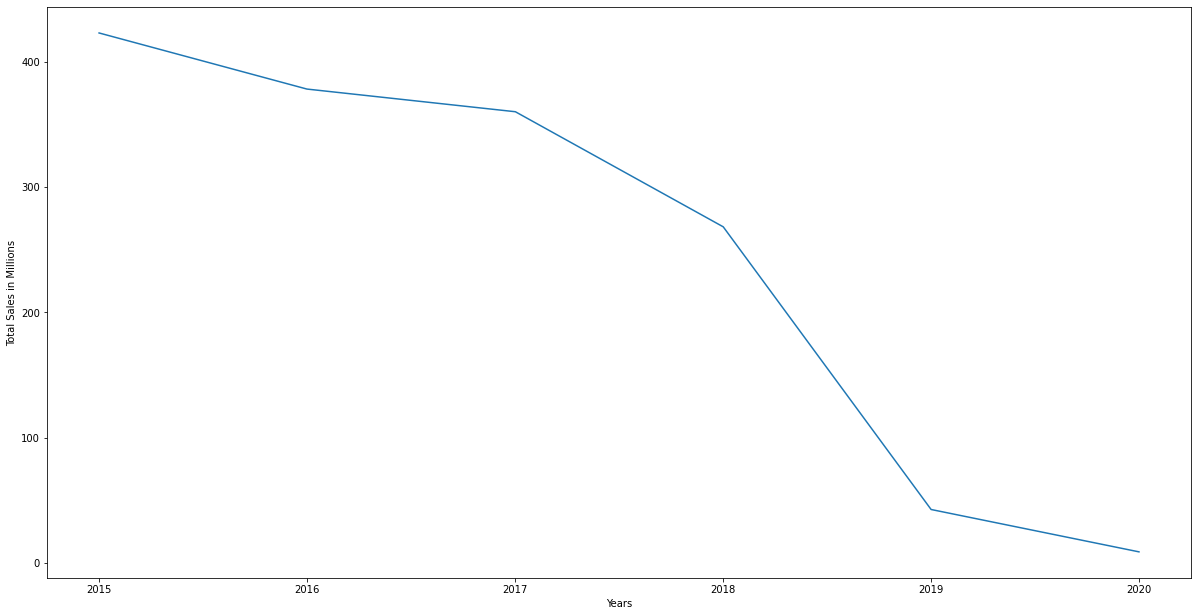

In [127]:
fig, ax = plt.subplots(figsize=(20.5, 10.5))

plt.xlabel("Years")
plt.ylabel("Total Sales in Millions")

new_game_sales_plot = sns.lineplot(data = new_game_sales_year, x = 'release_year', y = 'Total_Sales', ax=ax)

After plotting both the "newer video games" and "older video games", comparison between the sales trend cannot really be made given that it is possible for sales of old video games to continue increasing, even during releases of new games.

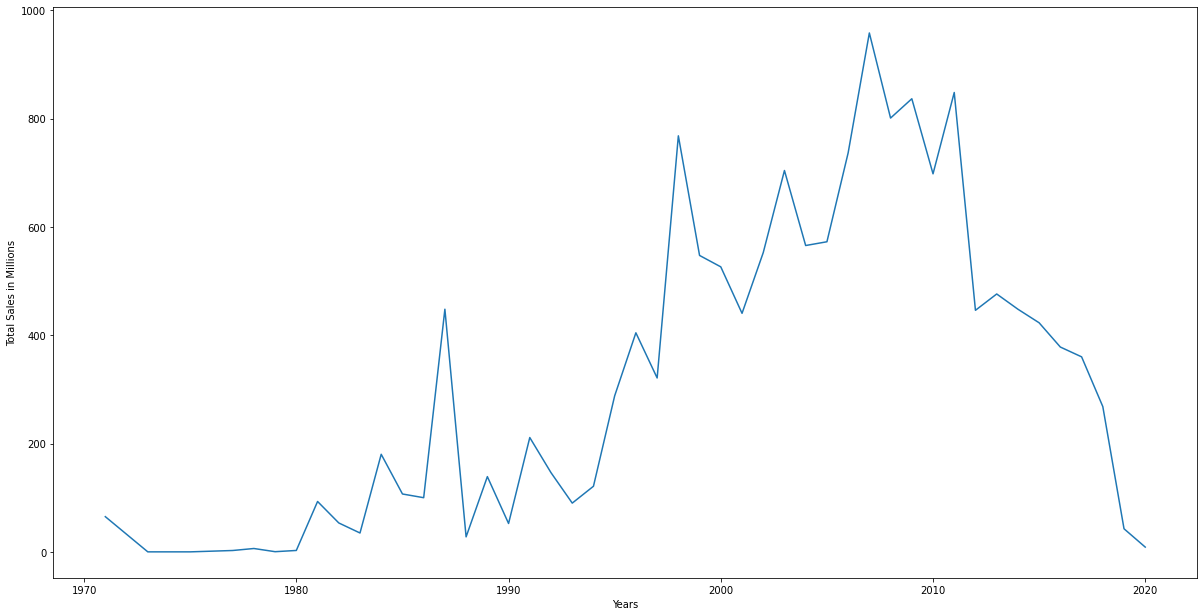

In [130]:
fig, ax = plt.subplots(figsize=(20.5, 10.5))

plt.xlabel("Years")
plt.ylabel("Total Sales in Millions")

old_new_sales_plot = sns.lineplot(data = old_new_sales_by_year, x = 'release_year', y = 'Total_Sales', ax=ax)
